In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import seaborn as sns

In [2]:
data=pd.read_csv('ML_Data_48.csv')

In [3]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [4]:
x=data.drop(['label'], axis=1)
y=data['label']

In [5]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [6]:
x_train, x_t, y_train, y_t= train_test_split(x,y,test_size=0.3, random_state=42)
x_train.shape, x_t.shape

((2614, 47), (1121, 47))

In [7]:
x_val, x_test, y_val, y_test= train_test_split(x_t, y_t, test_size=0.15, random_state=42)
x_val.shape, x_test.shape

((952, 47), (169, 47))

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, SGD

2024-08-18 03:34:04.512696: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-18 03:34:04.514017: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-18 03:34:04.536106: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-18 03:34:04.536131: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-18 03:34:04.536147: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [9]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [10]:
model = Sequential([
    Dense(2048, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.4),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(8, activation='softmax')
])

In [11]:
initial_learning_rate = 0.01
lr_schedule = ExponentialDecay(
    initial_learning_rate,      # Starting learning rate
    decay_steps=1000,         # How often to decay the learning rate
    decay_rate=0.96,            # The decay rate
    staircase=True              # Apply decay in discrete steps
)

# early_stopping = EarlyStopping(monitor='val_loss', patience=70, restore_best_weights=True)

In [12]:
# model.compile(optimizer=SGD(learning_rate=lr_schedule, 
#                             momentum=0.97, 
#                             nesterov=True),  # Enable Nesterov momentum
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics=['accuracy'])

In [13]:
model.compile(optimizer=Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train,
                                epochs=800,
                                batch_size=64,
                                validation_data= (x_val, y_val),
                                verbose=2)

Epoch 1/800
41/41 - 2s - loss: 1.9311 - accuracy: 0.2238 - val_loss: 1.8235 - val_accuracy: 0.2763 - 2s/epoch - 37ms/step
Epoch 2/800
41/41 - 1s - loss: 1.7704 - accuracy: 0.3095 - val_loss: 1.7233 - val_accuracy: 0.3351 - 554ms/epoch - 14ms/step
Epoch 3/800
41/41 - 1s - loss: 1.6743 - accuracy: 0.3558 - val_loss: 1.6122 - val_accuracy: 0.3803 - 550ms/epoch - 13ms/step
Epoch 4/800
41/41 - 1s - loss: 1.5831 - accuracy: 0.3979 - val_loss: 1.5177 - val_accuracy: 0.4422 - 539ms/epoch - 13ms/step
Epoch 5/800
41/41 - 1s - loss: 1.4955 - accuracy: 0.4453 - val_loss: 1.4108 - val_accuracy: 0.4748 - 531ms/epoch - 13ms/step
Epoch 6/800
41/41 - 1s - loss: 1.4082 - accuracy: 0.4751 - val_loss: 1.3331 - val_accuracy: 0.5063 - 528ms/epoch - 13ms/step
Epoch 7/800
41/41 - 1s - loss: 1.3396 - accuracy: 0.4939 - val_loss: 1.3342 - val_accuracy: 0.4832 - 529ms/epoch - 13ms/step
Epoch 8/800
41/41 - 1s - loss: 1.2949 - accuracy: 0.5099 - val_loss: 1.3081 - val_accuracy: 0.5305 - 529ms/epoch - 13ms/step
Epo

Epoch 67/800
41/41 - 1s - loss: 0.4690 - accuracy: 0.8336 - val_loss: 0.8887 - val_accuracy: 0.7742 - 580ms/epoch - 14ms/step
Epoch 68/800
41/41 - 1s - loss: 0.5093 - accuracy: 0.8309 - val_loss: 0.8576 - val_accuracy: 0.7595 - 575ms/epoch - 14ms/step
Epoch 69/800
41/41 - 1s - loss: 0.5487 - accuracy: 0.8156 - val_loss: 0.8452 - val_accuracy: 0.7584 - 549ms/epoch - 13ms/step
Epoch 70/800
41/41 - 1s - loss: 0.4945 - accuracy: 0.8321 - val_loss: 0.7965 - val_accuracy: 0.7857 - 583ms/epoch - 14ms/step
Epoch 71/800
41/41 - 1s - loss: 0.4822 - accuracy: 0.8428 - val_loss: 0.8389 - val_accuracy: 0.7857 - 581ms/epoch - 14ms/step
Epoch 72/800
41/41 - 1s - loss: 0.5195 - accuracy: 0.8221 - val_loss: 0.9148 - val_accuracy: 0.7637 - 556ms/epoch - 14ms/step
Epoch 73/800
41/41 - 1s - loss: 0.4558 - accuracy: 0.8512 - val_loss: 0.8368 - val_accuracy: 0.7784 - 568ms/epoch - 14ms/step
Epoch 74/800
41/41 - 1s - loss: 0.4781 - accuracy: 0.8344 - val_loss: 0.7963 - val_accuracy: 0.7773 - 576ms/epoch - 14

Epoch 132/800
41/41 - 1s - loss: 0.2479 - accuracy: 0.9220 - val_loss: 0.9853 - val_accuracy: 0.8078 - 545ms/epoch - 13ms/step
Epoch 133/800
41/41 - 1s - loss: 0.2404 - accuracy: 0.9231 - val_loss: 0.9698 - val_accuracy: 0.7952 - 548ms/epoch - 13ms/step
Epoch 134/800
41/41 - 1s - loss: 0.2872 - accuracy: 0.9082 - val_loss: 0.9944 - val_accuracy: 0.8057 - 547ms/epoch - 13ms/step
Epoch 135/800
41/41 - 1s - loss: 0.2883 - accuracy: 0.8959 - val_loss: 0.9833 - val_accuracy: 0.7994 - 555ms/epoch - 14ms/step
Epoch 136/800
41/41 - 1s - loss: 0.2904 - accuracy: 0.9082 - val_loss: 0.9822 - val_accuracy: 0.7899 - 550ms/epoch - 13ms/step
Epoch 137/800
41/41 - 1s - loss: 0.2661 - accuracy: 0.9155 - val_loss: 1.0264 - val_accuracy: 0.7931 - 547ms/epoch - 13ms/step
Epoch 138/800
41/41 - 1s - loss: 0.2903 - accuracy: 0.9009 - val_loss: 0.8685 - val_accuracy: 0.7836 - 546ms/epoch - 13ms/step
Epoch 139/800
41/41 - 1s - loss: 0.2899 - accuracy: 0.8959 - val_loss: 0.9614 - val_accuracy: 0.7994 - 548ms/ep

Epoch 197/800
41/41 - 1s - loss: 0.2149 - accuracy: 0.9361 - val_loss: 0.9284 - val_accuracy: 0.8067 - 553ms/epoch - 13ms/step
Epoch 198/800
41/41 - 1s - loss: 0.1935 - accuracy: 0.9342 - val_loss: 0.9804 - val_accuracy: 0.8025 - 557ms/epoch - 14ms/step
Epoch 199/800
41/41 - 1s - loss: 0.1908 - accuracy: 0.9376 - val_loss: 0.9546 - val_accuracy: 0.8046 - 554ms/epoch - 14ms/step
Epoch 200/800
41/41 - 1s - loss: 0.1907 - accuracy: 0.9350 - val_loss: 0.9974 - val_accuracy: 0.8025 - 554ms/epoch - 14ms/step
Epoch 201/800
41/41 - 1s - loss: 0.1768 - accuracy: 0.9457 - val_loss: 1.0013 - val_accuracy: 0.7994 - 552ms/epoch - 13ms/step
Epoch 202/800
41/41 - 1s - loss: 0.1585 - accuracy: 0.9430 - val_loss: 1.1293 - val_accuracy: 0.8004 - 552ms/epoch - 13ms/step
Epoch 203/800
41/41 - 1s - loss: 0.1864 - accuracy: 0.9376 - val_loss: 1.0682 - val_accuracy: 0.7962 - 557ms/epoch - 14ms/step
Epoch 204/800
41/41 - 1s - loss: 0.1932 - accuracy: 0.9384 - val_loss: 1.0231 - val_accuracy: 0.7920 - 555ms/ep

Epoch 262/800
41/41 - 1s - loss: 0.1493 - accuracy: 0.9507 - val_loss: 1.1109 - val_accuracy: 0.8130 - 550ms/epoch - 13ms/step
Epoch 263/800
41/41 - 1s - loss: 0.1751 - accuracy: 0.9480 - val_loss: 1.0048 - val_accuracy: 0.8120 - 549ms/epoch - 13ms/step
Epoch 264/800
41/41 - 1s - loss: 0.1409 - accuracy: 0.9556 - val_loss: 1.0162 - val_accuracy: 0.8151 - 551ms/epoch - 13ms/step
Epoch 265/800
41/41 - 1s - loss: 0.1409 - accuracy: 0.9587 - val_loss: 1.1682 - val_accuracy: 0.8099 - 551ms/epoch - 13ms/step
Epoch 266/800
41/41 - 1s - loss: 0.1918 - accuracy: 0.9422 - val_loss: 1.0915 - val_accuracy: 0.8109 - 555ms/epoch - 14ms/step
Epoch 267/800
41/41 - 1s - loss: 0.1946 - accuracy: 0.9361 - val_loss: 0.9989 - val_accuracy: 0.7962 - 550ms/epoch - 13ms/step
Epoch 268/800
41/41 - 1s - loss: 0.1657 - accuracy: 0.9430 - val_loss: 1.1040 - val_accuracy: 0.8120 - 550ms/epoch - 13ms/step
Epoch 269/800
41/41 - 1s - loss: 0.1441 - accuracy: 0.9537 - val_loss: 1.1029 - val_accuracy: 0.8109 - 549ms/ep

Epoch 327/800
41/41 - 1s - loss: 0.1502 - accuracy: 0.9591 - val_loss: 1.0277 - val_accuracy: 0.8120 - 552ms/epoch - 13ms/step
Epoch 328/800
41/41 - 1s - loss: 0.1784 - accuracy: 0.9464 - val_loss: 1.0012 - val_accuracy: 0.8162 - 551ms/epoch - 13ms/step
Epoch 329/800
41/41 - 1s - loss: 0.1432 - accuracy: 0.9579 - val_loss: 1.2400 - val_accuracy: 0.8183 - 552ms/epoch - 13ms/step
Epoch 330/800
41/41 - 1s - loss: 0.1408 - accuracy: 0.9575 - val_loss: 1.0370 - val_accuracy: 0.8235 - 552ms/epoch - 13ms/step
Epoch 331/800
41/41 - 1s - loss: 0.1287 - accuracy: 0.9656 - val_loss: 1.0509 - val_accuracy: 0.8130 - 551ms/epoch - 13ms/step
Epoch 332/800
41/41 - 1s - loss: 0.1526 - accuracy: 0.9514 - val_loss: 1.1425 - val_accuracy: 0.8246 - 554ms/epoch - 14ms/step
Epoch 333/800
41/41 - 1s - loss: 0.1363 - accuracy: 0.9572 - val_loss: 1.1205 - val_accuracy: 0.8235 - 550ms/epoch - 13ms/step
Epoch 334/800
41/41 - 1s - loss: 0.1192 - accuracy: 0.9564 - val_loss: 1.1891 - val_accuracy: 0.8183 - 550ms/ep

Epoch 392/800
41/41 - 1s - loss: 0.1407 - accuracy: 0.9560 - val_loss: 0.9545 - val_accuracy: 0.8225 - 553ms/epoch - 13ms/step
Epoch 393/800
41/41 - 1s - loss: 0.0906 - accuracy: 0.9675 - val_loss: 1.0884 - val_accuracy: 0.8298 - 551ms/epoch - 13ms/step
Epoch 394/800
41/41 - 1s - loss: 0.1439 - accuracy: 0.9583 - val_loss: 1.0721 - val_accuracy: 0.8162 - 557ms/epoch - 14ms/step
Epoch 395/800
41/41 - 1s - loss: 0.1222 - accuracy: 0.9602 - val_loss: 1.1093 - val_accuracy: 0.8225 - 550ms/epoch - 13ms/step
Epoch 396/800
41/41 - 1s - loss: 0.0965 - accuracy: 0.9702 - val_loss: 1.1331 - val_accuracy: 0.8267 - 605ms/epoch - 15ms/step
Epoch 397/800
41/41 - 1s - loss: 0.1068 - accuracy: 0.9610 - val_loss: 1.1526 - val_accuracy: 0.8214 - 551ms/epoch - 13ms/step
Epoch 398/800
41/41 - 1s - loss: 0.1054 - accuracy: 0.9671 - val_loss: 1.2127 - val_accuracy: 0.8204 - 552ms/epoch - 13ms/step
Epoch 399/800
41/41 - 1s - loss: 0.1036 - accuracy: 0.9667 - val_loss: 1.1964 - val_accuracy: 0.8099 - 552ms/ep

Epoch 457/800
41/41 - 1s - loss: 0.0973 - accuracy: 0.9682 - val_loss: 1.3480 - val_accuracy: 0.8151 - 556ms/epoch - 14ms/step
Epoch 458/800
41/41 - 1s - loss: 0.1116 - accuracy: 0.9621 - val_loss: 1.2895 - val_accuracy: 0.8141 - 553ms/epoch - 13ms/step
Epoch 459/800
41/41 - 1s - loss: 0.1210 - accuracy: 0.9621 - val_loss: 1.0761 - val_accuracy: 0.8246 - 550ms/epoch - 13ms/step
Epoch 460/800
41/41 - 1s - loss: 0.0833 - accuracy: 0.9713 - val_loss: 1.1238 - val_accuracy: 0.8204 - 553ms/epoch - 13ms/step
Epoch 461/800
41/41 - 1s - loss: 0.1020 - accuracy: 0.9644 - val_loss: 1.1394 - val_accuracy: 0.8214 - 555ms/epoch - 14ms/step
Epoch 462/800
41/41 - 1s - loss: 0.1228 - accuracy: 0.9587 - val_loss: 1.1281 - val_accuracy: 0.8130 - 557ms/epoch - 14ms/step
Epoch 463/800
41/41 - 1s - loss: 0.1164 - accuracy: 0.9579 - val_loss: 1.1828 - val_accuracy: 0.8193 - 555ms/epoch - 14ms/step
Epoch 464/800
41/41 - 1s - loss: 0.1477 - accuracy: 0.9587 - val_loss: 1.0276 - val_accuracy: 0.8204 - 555ms/ep

Epoch 522/800
41/41 - 1s - loss: 0.0834 - accuracy: 0.9725 - val_loss: 1.2006 - val_accuracy: 0.8141 - 553ms/epoch - 13ms/step
Epoch 523/800
41/41 - 1s - loss: 0.1178 - accuracy: 0.9652 - val_loss: 1.0886 - val_accuracy: 0.8109 - 552ms/epoch - 13ms/step
Epoch 524/800
41/41 - 1s - loss: 0.1245 - accuracy: 0.9617 - val_loss: 1.1247 - val_accuracy: 0.8141 - 551ms/epoch - 13ms/step
Epoch 525/800
41/41 - 1s - loss: 0.0904 - accuracy: 0.9633 - val_loss: 1.1886 - val_accuracy: 0.8151 - 552ms/epoch - 13ms/step
Epoch 526/800
41/41 - 1s - loss: 0.1018 - accuracy: 0.9686 - val_loss: 1.1713 - val_accuracy: 0.8099 - 550ms/epoch - 13ms/step
Epoch 527/800
41/41 - 1s - loss: 0.0862 - accuracy: 0.9671 - val_loss: 1.4618 - val_accuracy: 0.8109 - 554ms/epoch - 14ms/step
Epoch 528/800
41/41 - 1s - loss: 0.0968 - accuracy: 0.9690 - val_loss: 1.1797 - val_accuracy: 0.8120 - 558ms/epoch - 14ms/step
Epoch 529/800
41/41 - 1s - loss: 0.1232 - accuracy: 0.9652 - val_loss: 1.0161 - val_accuracy: 0.8204 - 555ms/ep

Epoch 587/800
41/41 - 1s - loss: 0.0856 - accuracy: 0.9721 - val_loss: 1.3329 - val_accuracy: 0.8214 - 554ms/epoch - 14ms/step
Epoch 588/800
41/41 - 1s - loss: 0.0895 - accuracy: 0.9686 - val_loss: 1.3393 - val_accuracy: 0.8151 - 551ms/epoch - 13ms/step
Epoch 589/800
41/41 - 1s - loss: 0.0863 - accuracy: 0.9690 - val_loss: 1.3988 - val_accuracy: 0.8120 - 555ms/epoch - 14ms/step
Epoch 590/800
41/41 - 1s - loss: 0.0843 - accuracy: 0.9732 - val_loss: 1.4005 - val_accuracy: 0.8204 - 556ms/epoch - 14ms/step
Epoch 591/800
41/41 - 1s - loss: 0.0676 - accuracy: 0.9744 - val_loss: 1.4140 - val_accuracy: 0.8162 - 553ms/epoch - 13ms/step
Epoch 592/800
41/41 - 1s - loss: 0.0886 - accuracy: 0.9713 - val_loss: 1.4099 - val_accuracy: 0.8130 - 553ms/epoch - 13ms/step
Epoch 593/800
41/41 - 1s - loss: 0.0876 - accuracy: 0.9721 - val_loss: 1.4233 - val_accuracy: 0.8130 - 556ms/epoch - 14ms/step
Epoch 594/800
41/41 - 1s - loss: 0.0839 - accuracy: 0.9721 - val_loss: 1.3452 - val_accuracy: 0.8277 - 554ms/ep

Epoch 652/800
41/41 - 1s - loss: 0.0962 - accuracy: 0.9702 - val_loss: 1.3694 - val_accuracy: 0.8225 - 552ms/epoch - 13ms/step
Epoch 653/800
41/41 - 1s - loss: 0.0787 - accuracy: 0.9728 - val_loss: 1.5152 - val_accuracy: 0.8214 - 553ms/epoch - 13ms/step
Epoch 654/800
41/41 - 1s - loss: 0.0943 - accuracy: 0.9682 - val_loss: 1.4616 - val_accuracy: 0.8130 - 551ms/epoch - 13ms/step
Epoch 655/800
41/41 - 1s - loss: 0.1041 - accuracy: 0.9725 - val_loss: 1.2692 - val_accuracy: 0.8151 - 555ms/epoch - 14ms/step
Epoch 656/800
41/41 - 1s - loss: 0.0923 - accuracy: 0.9694 - val_loss: 1.2622 - val_accuracy: 0.8193 - 554ms/epoch - 14ms/step
Epoch 657/800
41/41 - 1s - loss: 0.0634 - accuracy: 0.9782 - val_loss: 1.4548 - val_accuracy: 0.8214 - 550ms/epoch - 13ms/step
Epoch 658/800
41/41 - 1s - loss: 0.0761 - accuracy: 0.9790 - val_loss: 1.4788 - val_accuracy: 0.8204 - 554ms/epoch - 14ms/step
Epoch 659/800
41/41 - 1s - loss: 0.0803 - accuracy: 0.9717 - val_loss: 1.3548 - val_accuracy: 0.8235 - 555ms/ep

Epoch 717/800
41/41 - 1s - loss: 0.1111 - accuracy: 0.9694 - val_loss: 1.2607 - val_accuracy: 0.8225 - 558ms/epoch - 14ms/step
Epoch 718/800
41/41 - 1s - loss: 0.0742 - accuracy: 0.9759 - val_loss: 1.4220 - val_accuracy: 0.8099 - 552ms/epoch - 13ms/step
Epoch 719/800
41/41 - 1s - loss: 0.0618 - accuracy: 0.9813 - val_loss: 1.4715 - val_accuracy: 0.8256 - 554ms/epoch - 14ms/step
Epoch 720/800
41/41 - 1s - loss: 0.0669 - accuracy: 0.9790 - val_loss: 1.4602 - val_accuracy: 0.8172 - 552ms/epoch - 13ms/step
Epoch 721/800
41/41 - 1s - loss: 0.0752 - accuracy: 0.9721 - val_loss: 1.4309 - val_accuracy: 0.8109 - 553ms/epoch - 13ms/step
Epoch 722/800
41/41 - 1s - loss: 0.0985 - accuracy: 0.9663 - val_loss: 1.3257 - val_accuracy: 0.8193 - 553ms/epoch - 13ms/step
Epoch 723/800
41/41 - 1s - loss: 0.0840 - accuracy: 0.9725 - val_loss: 1.3842 - val_accuracy: 0.8214 - 554ms/epoch - 14ms/step
Epoch 724/800
41/41 - 1s - loss: 0.0767 - accuracy: 0.9793 - val_loss: 1.4055 - val_accuracy: 0.8099 - 551ms/ep

Epoch 782/800
41/41 - 1s - loss: 0.0823 - accuracy: 0.9698 - val_loss: 1.5869 - val_accuracy: 0.8078 - 551ms/epoch - 13ms/step
Epoch 783/800
41/41 - 1s - loss: 0.0672 - accuracy: 0.9809 - val_loss: 1.5868 - val_accuracy: 0.8183 - 551ms/epoch - 13ms/step
Epoch 784/800
41/41 - 1s - loss: 0.0576 - accuracy: 0.9816 - val_loss: 1.5362 - val_accuracy: 0.8204 - 556ms/epoch - 14ms/step
Epoch 785/800
41/41 - 1s - loss: 0.1047 - accuracy: 0.9675 - val_loss: 1.4139 - val_accuracy: 0.8172 - 598ms/epoch - 15ms/step
Epoch 786/800
41/41 - 1s - loss: 0.0846 - accuracy: 0.9755 - val_loss: 1.4008 - val_accuracy: 0.8172 - 563ms/epoch - 14ms/step
Epoch 787/800
41/41 - 1s - loss: 0.0648 - accuracy: 0.9809 - val_loss: 1.4628 - val_accuracy: 0.8204 - 556ms/epoch - 14ms/step
Epoch 788/800
41/41 - 1s - loss: 0.0638 - accuracy: 0.9793 - val_loss: 1.4631 - val_accuracy: 0.8277 - 554ms/epoch - 14ms/step
Epoch 789/800
41/41 - 1s - loss: 0.0551 - accuracy: 0.9820 - val_loss: 1.5716 - val_accuracy: 0.8225 - 553ms/ep

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              98304     
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               1

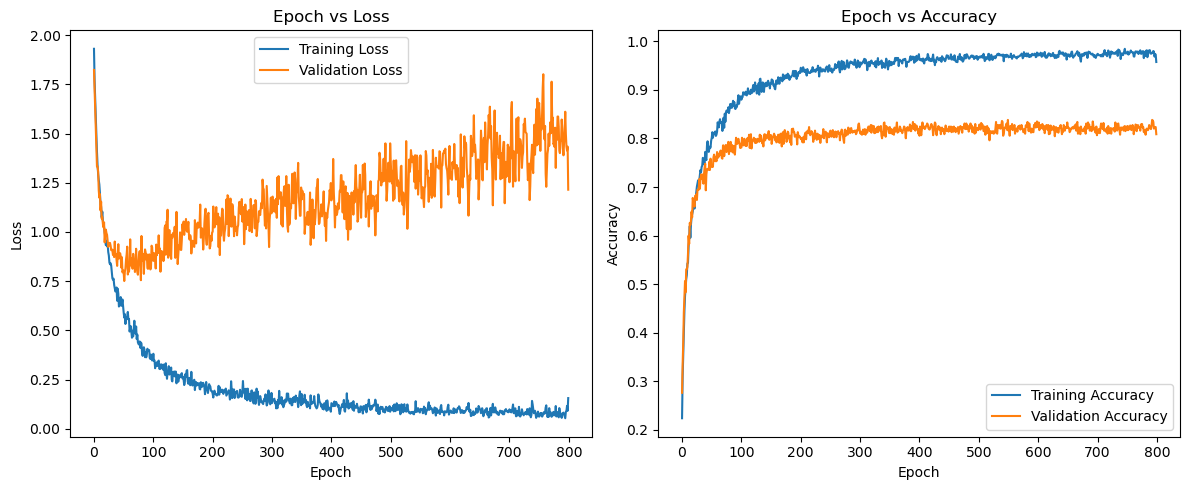

In [16]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 99.27%
Test Accuracy: 81.66%


6/6 [==============================] - 0s 2ms/step


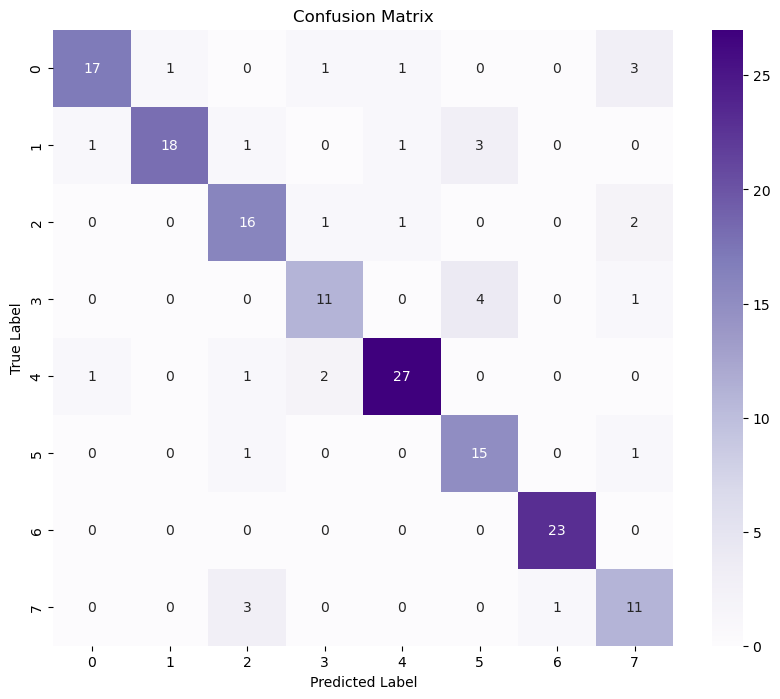

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81        23
           1       0.95      0.75      0.84        24
           2       0.73      0.80      0.76        20
           3       0.73      0.69      0.71        16
           4       0.90      0.87      0.89        31
           5       0.68      0.88      0.77        17
           6       0.96      1.00      0.98        23
           7       0.61      0.73      0.67        15

    accuracy                           0.82       169
   macro avg       0.81      0.81      0.80       169
weighted avg       0.83      0.82      0.82       169



In [18]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

if len(y_test.shape) == 1 or y_test.shape[1] == 1:
    y_true = y_test  
else:
    y_true = np.argmax(y_test, axis=1)  


conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(len(np.unique(y_true)))])
print("Classification Report:")
print(class_report)
